In [1]:
import os
import pandas as pd
import numpy as np
import scipy as st
import matplotlib.pyplot as plt
import pathlib as path

In [2]:
marvel_dc_movie_df = pd.read_csv('dc_marvel_movie_performance.csv')
marvel_dc_movie_df.dtypes

Film                                             object
U.S. release date                                object
Box office gross Domestic (U.S. and Canada )     object
Box office gross Other territories               object
Box office gross Worldwide                       object
Budget                                           object
MCU                                                bool
Phase                                           float64
Distributor                                      object
MPAA Rating                                      object
Length                                           object
Minutes                                           int64
Franchise                                        object
Character Family                                 object
Domestic %                                       object
Gross to Budget                                 float64
Rotten Tomatoes Critic Score                      int64
Male/Female-led                                 

In [3]:
#Drew

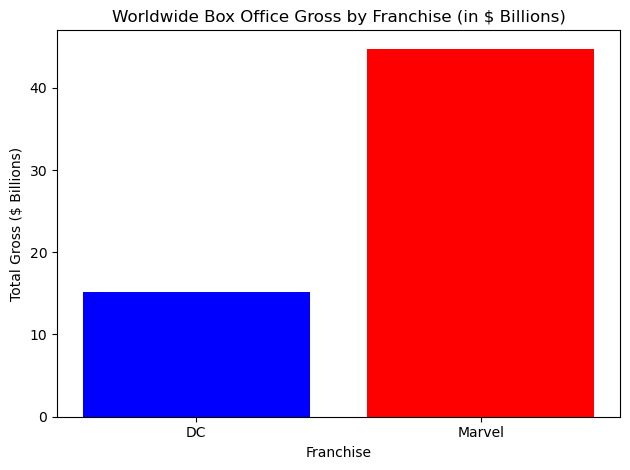

In [4]:
#convert from object to float
marvel_dc_movie_df['Box office gross Worldwide'] = (
    marvel_dc_movie_df['Box office gross Worldwide']
    .replace({'\\$': '', ',': ''}, regex=True)
    .astype(float)
)

# Group by MCU vs. DC
total_gross_by_franchise = marvel_dc_movie_df.groupby('Franchise')['Box office gross Worldwide'].sum()

# Convert to billions
total_gross_by_franchise_billion = total_gross_by_franchise / 1000000000

# Plotting
plt.bar(total_gross_by_franchise_billion.index, total_gross_by_franchise_billion, color=['blue', 'red'])

# Add titles and labels
plt.title('Worldwide Box Office Gross by Franchise (in $ Billions)')
plt.xlabel('Franchise')
plt.ylabel('Total Gross ($ Billions)')
plt.xticks(rotation=0)  
plt.grid(False)

# show graph
plt.tight_layout()
plt.savefig(os.path.join('images','WorldwideGross_Franchise.png'))
plt.show()

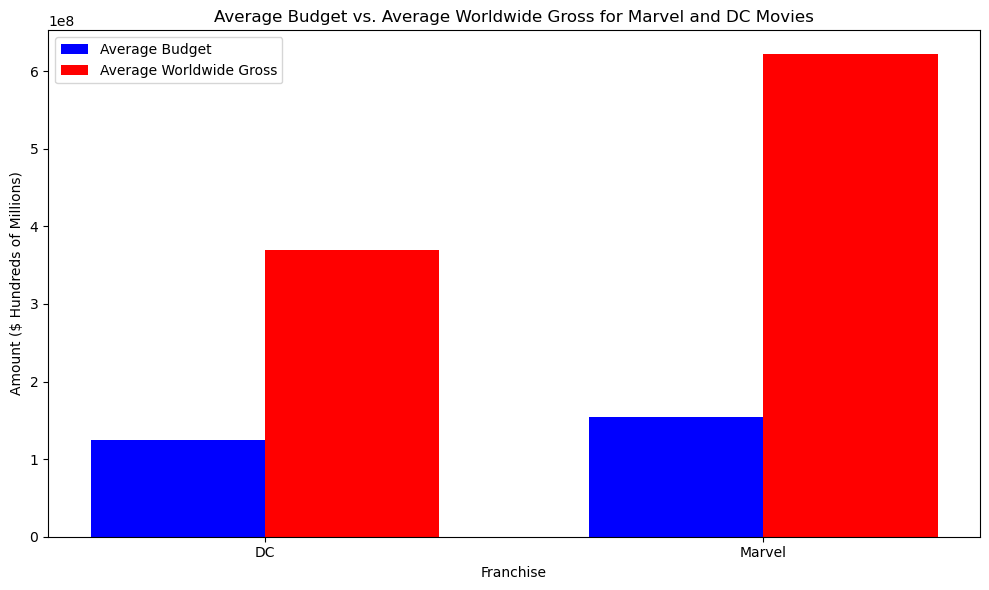

In [5]:
marvel_dc_movie_df['Box office gross Worldwide'] = (
    marvel_dc_movie_df['Box office gross Worldwide']
    .replace({'\\$': '', ',': ''}, regex=True)
    .astype(float)
)

# Convert the Budget from object to float
marvel_dc_movie_df['Budget'] = (
    marvel_dc_movie_df['Budget']
    .replace({'\\$': '', ',': ''}, regex=True)
    .astype(float)
)
# Calculate averages
averages = marvel_dc_movie_df.groupby('Franchise').agg({'Budget': 'mean', 'Box office gross Worldwide': 'mean'}).reset_index()

# Plotting
bar_width = 0.35
x = np.arange(len(averages))  # Use np.arange for positions

# Create the figure
plt.figure(figsize=(10, 6))

# Create bars for Budget and Worldwide Gross
plt.bar(x, averages['Budget'], width=bar_width, label='Average Budget', color='blue')
plt.bar(x + bar_width, averages['Box office gross Worldwide'], width=bar_width, label='Average Worldwide Gross', color='red')  # Simplified line

# Adding labels and title
plt.xlabel('Franchise')
plt.ylabel('Amount ($ Hundreds of Millions)')
plt.title('Average Budget vs. Average Worldwide Gross for Marvel and DC Movies')
plt.xticks(x + bar_width / 2, averages['Franchise'])  # Center x-ticks

plt.legend()

# Display the bar graph
plt.tight_layout()
plt.savefig(os.path.join('images','avgbudget_v_avgWorldwideGross.png'))
plt.show()

In [6]:
#Nikki

In [7]:
grouped_movie_df = marvel_dc_movie_df.groupby(['Franchise', 'Male/Female-led', 'Budget', 'Box office gross Worldwide', 
                                               'Rotten Tomatoes Critic Score'])
grouped_movies = pd.DataFrame(grouped_movie_df['Male/Female-led'].count())
grouped_movies

Male/Female-led
Franchise Male/Female-led Budget      Box office gross Worldwide Rotten Tomatoes Critic Score                 
DC        Co-starring     10000000.0  5.239024e+07               91                                          1
          Female          35000000.0  1.429644e+07               8                                           1
                          84500000.0  2.053728e+08               78                                          1
                          100000000.0 8.240238e+07               8                                           1
                          149000000.0 8.239707e+08               93                                          1
...                                                                                                        ...
Marvel    Male            250000000.0 1.405018e+09               76                                          1
                          258000000.0 8.949834e+08               63                                          1
                          294500000.0 9.557758e+08               73                                          1
                          325000000.0 2.052415e+09               85                                          1
                          356000000.0 2.799439e+09               94                                          1

[113 rows x 1 columns]

In [8]:
grouped_movies_rename = grouped_movies.rename(columns={'Male/Female-led': 'Total Male or Female Led Film'})
grouped_movies_rename

Total Male or Female Led Film
Franchise Male/Female-led Budget      Box office gross Worldwide Rotten Tomatoes Critic Score                               
DC        Co-starring     10000000.0  5.239024e+07               91                                                        1
          Female          35000000.0  1.429644e+07               8                                                         1
                          84500000.0  2.053728e+08               78                                                        1
                          100000000.0 8.240238e+07               8                                                         1
                          149000000.0 8.239707e+08               93                                                        1
...                                                                                                                      ...
Marvel    Male            250000000.0 1.405018e+09               76                                                        1
                          258000000.0 8.949834e+08               63                                                        1
                          294500000.0 9.557758e+08               73                                                        1
                          325000000.0 2.052415e+09               85                                                        1
                          356000000.0 2.799439e+09               94                                                        1

[113 rows x 1 columns]

In [9]:
grouped_movie_df_franchiselist = marvel_dc_movie_df.groupby(['Franchise', 'Male/Female-led'])['Budget'].sum()
#grouped_movies = pd.DataFrame(grouped_movie_df['Male/Female-led'].rest_index())
grouped_movie_df_franchiselist

Franchise  Male/Female-led
DC         Co-starring        1.000000e+07
           Female             5.685000e+08
           Male               4.531600e+09
Marvel     Co-starring        4.290000e+08
           Female             1.428500e+09
           Male               9.275500e+09
Name: Budget, dtype: float64

In [10]:
figure_variable = pd.DataFrame(grouped_movie_df_franchiselist)
figure_variable.reset_index(inplace=True)
figure_variable

,Franchise,Male/Female-led,Budget
0,DC,Co-starring,1.000000e+07
1,DC,Female,5.685000e+08
2,DC,Male,4.531600e+09
3,Marvel,Co-starring,4.290000e+08
4,Marvel,Female,1.428500e+09
5,Marvel,Male,9.275500e+09


In [11]:
grouped_movie_df_count = marvel_dc_movie_df.groupby(['Franchise', 'Male/Female-led'])['Film'].count()
grouped_movie_df_count.head()

Franchise  Male/Female-led
DC         Co-starring         1
           Female              5
           Male               35
Marvel     Co-starring         3
           Female              8
Name: Film, dtype: int64

In [12]:
#Marvel types

marvel_dc_movie_df.head()

#convert budget to float(int)
marvel_dc_movie_df['Budget'] = (
    marvel_dc_movie_df['Budget']
    .replace({'\\$': '', ',': ''}, regex=True)
    .astype(float)
)

#convert box office gross to float(int)
marvel_dc_movie_df['Box office gross Worldwide'] = (
    marvel_dc_movie_df['Box office gross Worldwide']
    .replace({'\\$': '', ',': ''}, regex=True)
    .astype(float)
)
marvel_dc_movie_df.head()

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449.00","$166,000,000.00",300478449.0,55000000.0,False,NaN,Warner Bros.,PG,...,Superman,45%,5.46,94,Male,1978,"$1,404,237,104.00","$257,033,544.00","$137,500,000.00",Success
1,Superman II,19/06/1981,"$108,185,706.00","$108,200,000.00",216385706.0,54000000.0,False,NaN,Warner Bros.,PG,...,Superman,50%,4.01,83,Male,1981,"$725,336,273.00","$181,010,842.00","$135,000,000.00",Success
2,Superman III,17/06/1983,"$59,950,623.00","$20,300,000.00",80250623.0,39000000.0,False,NaN,Warner Bros.,PG,...,Superman,75%,2.06,29,Male,1983,"$245,506,947.00","$119,310,861.00","$97,500,000.00",Flop
3,Supergirl,21/11/1984,"$14,296,438.00",NaN,14296438.0,35000000.0,False,NaN,Tri-Star Pictures,PG,...,Superman,100%,0.41,8,Female,1984,"$41,926,345.00","$102,642,497.00","$87,500,000.00",Flop
4,Howard the Duck,01/08/1986,"$16,295,774.00","$21,667,000.00",37962774.0,37000000.0,False,NaN,Universal Pictures,PG,...,Howard the Duck,43%,1.03,13,Male,1986,"$37,962,774.00","$37,000,000.00","$92,500,000.00",Flop


In [13]:
grouped_movie_df = marvel_dc_movie_df.groupby(['Franchise', 'Male/Female-led', 'Budget', 'Box office gross Worldwide', 'Rotten Tomatoes Critic Score'])
grouped_movies = pd.DataFrame(grouped_movie_df['Male/Female-led'].count())

In [14]:
grouped_movies_rename = grouped_movies.rename(columns={'Male/Female-led': 'Total Male or Female Led Film'})
grouped_movies_rename

Total Male or Female Led Film
Franchise Male/Female-led Budget      Box office gross Worldwide Rotten Tomatoes Critic Score                               
DC        Co-starring     10000000.0  5.239024e+07               91                                                        1
          Female          35000000.0  1.429644e+07               8                                                         1
                          84500000.0  2.053728e+08               78                                                        1
                          100000000.0 8.240238e+07               8                                                         1
                          149000000.0 8.239707e+08               93                                                        1
...                                                                                                                      ...
Marvel    Male            250000000.0 1.405018e+09               76                                                        1
                          258000000.0 8.949834e+08               63                                                        1
                          294500000.0 9.557758e+08               73                                                        1
                          325000000.0 2.052415e+09               85                                                        1
                          356000000.0 2.799439e+09               94                                                        1

[113 rows x 1 columns]

In [15]:
grouped_movies_rename.index.names

FrozenList(['Franchise', 'Male/Female-led', 'Budget', 'Box office gross Worldwide', 'Rotten Tomatoes Critic Score'])

In [16]:
grouped_movies_rename.columns

Index(['Total Male or Female Led Film'], dtype='object')

In [17]:
grouped_movies_rename.reset_index(inplace=True)
grouped_movies_rename.head()

,Franchise,Male/Female-led,Budget,Box office gross Worldwide,Rotten Tomatoes Critic Score,Total Male or Female Led Film
0,DC,Co-starring,10000000.0,52390236.0,91,1
1,DC,Female,35000000.0,14296438.0,8,1
2,DC,Female,84500000.0,205372791.0,78,1
3,DC,Female,100000000.0,82402379.0,8,1
4,DC,Female,149000000.0,823970682.0,93,1


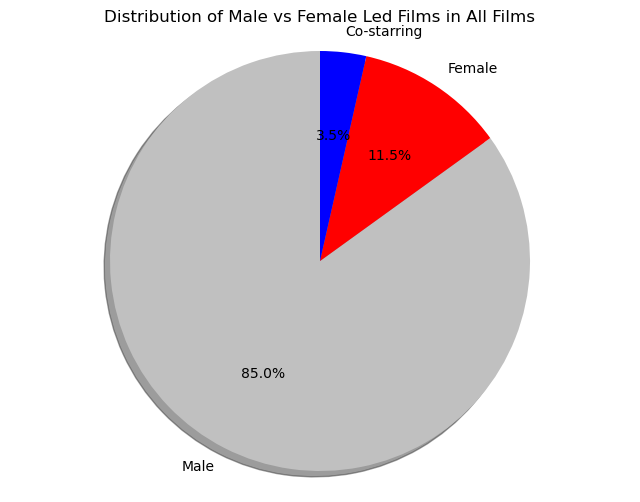

In [18]:
#generate pie chart VISUALIZATION #1
male_vs_female = grouped_movies_rename[['Franchise','Male/Female-led']]
male_female_counts = male_vs_female['Male/Female-led'].value_counts()
segment_colors = ["silver", "red", "blue"]
plt.figure(figsize=(8,6))
plt.pie(male_female_counts, labels=male_female_counts.index, colors= segment_colors, autopct='%1.1f%%', startangle=90, shadow=True, )
plt.title('Distribution of Male vs Female Led Films in All Films')
plt.axis('equal')
plt.savefig(os.path.join('images','picture name.png'))
plt.show()

In [19]:
showlist = figure_variable.loc[(figure_variable["Male/Female-led"] == "Male"), :]
showlist.head()

,Franchise,Male/Female-led,Budget
2,DC,Male,4.531600e+09
5,Marvel,Male,9.275500e+09


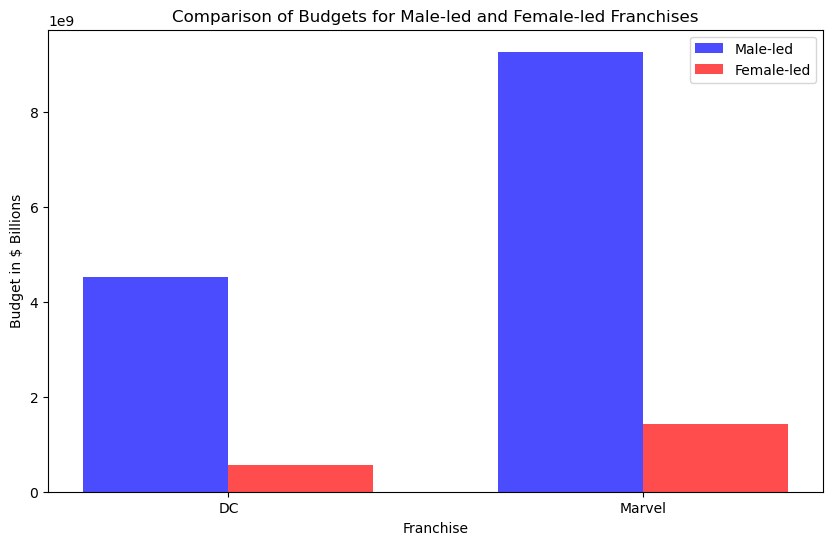

In [35]:
# Sample DataFrame similar to the one shown
data = {
    'Franchise': ['DC', 'Marvel'],
    'Male': [4.5316e9, 9.2755e9],
    'Female': [5.685e8, 1.4285e9]
}
df = pd.DataFrame(data)
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
# Define bar width and positions
bar_width = 0.35
indices = np.arange(len(df))
# Plot the Male-led bars
ax.bar(indices, df['Male'], width=bar_width, label='Male-led', color='blue', alpha=0.7)
# Plot the Female-led bars, slightly shifted to the right
ax.bar(indices + bar_width, df['Female'], width=bar_width, label='Female-led', color='red', alpha=0.7)
# Set labels and title
ax.set_xlabel('Franchise')
ax.set_ylabel('Budget in $ Billions')
ax.set_title('Comparison of Budgets for Male-led and Female-led Franchises')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(df['Franchise'])
# Add a legend
ax.legend()
# Show the plot
plt.savefig(os.path.join('images','picture name.png'))
plt.show()

In [21]:
#Nathan

In [22]:
rotten_grouped_movie_df = marvel_dc_movie_df.groupby(['Film','Franchise', 'Year', 'Rotten Tomatoes Critic Score', 'Budget'])
rotten_grouped_movie_df.head()

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449.00","$166,000,000.00",300478449.0,55000000.0,False,NaN,Warner Bros.,PG,...,Superman,45%,5.46,94,Male,1978,"$1,404,237,104.00","$257,033,544.00","$137,500,000.00",Success
1,Superman II,19/06/1981,"$108,185,706.00","$108,200,000.00",216385706.0,54000000.0,False,NaN,Warner Bros.,PG,...,Superman,50%,4.01,83,Male,1981,"$725,336,273.00","$181,010,842.00","$135,000,000.00",Success
2,Superman III,17/06/1983,"$59,950,623.00","$20,300,000.00",80250623.0,39000000.0,False,NaN,Warner Bros.,PG,...,Superman,75%,2.06,29,Male,1983,"$245,506,947.00","$119,310,861.00","$97,500,000.00",Flop
3,Supergirl,21/11/1984,"$14,296,438.00",NaN,14296438.0,35000000.0,False,NaN,Tri-Star Pictures,PG,...,Superman,100%,0.41,8,Female,1984,"$41,926,345.00","$102,642,497.00","$87,500,000.00",Flop
4,Howard the Duck,01/08/1986,"$16,295,774.00","$21,667,000.00",37962774.0,37000000.0,False,NaN,Universal Pictures,PG,...,Howard the Duck,43%,1.03,13,Male,1986,"$37,962,774.00","$37,000,000.00","$92,500,000.00",Flop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,The Flash,16/06/2023,"$108,133,313.00","$162,500,000.00",270633313.0,200000000.0,False,NaN,Warner Bros.,PG-13,...,Flash,40%,1.35,63,Male,2023,"$270,633,313.00","$200,000,000.00","$500,000,000.00",Flop
109,Blue Beetle,18/08/2023,"$72,488,072.00","$56,800,000.00",129288072.0,120000000.0,False,NaN,Warner Bros.,PG-13,...,Blue Beetle,56%,1.08,78,Male,2023,"$129,288,072.00","$120,000,000.00","$300,000,000.00",Flop
110,The Marvels,10/11/2023,"$84,500,223.00","$121,373,601.00",205873824.0,219800000.0,True,5.0,Walt Disney Studios Motion Pictures,PG-13,...,Captain Marvel,41%,0.94,62,Female,2023,"$205,873,824.00","$219,800,000.00","$549,500,000.00",Flop
111,Aquaman and the Lost Kingdom,20/12/2023,"$124,436,589.00","$309,900,000.00",434336589.0,205000000.0,False,NaN,Warner Bros.,PG-13,...,Aquaman,29%,2.12,35,Male,2023,"$434,336,589.00","$205,000,000.00","$512,500,000.00",Flop


In [23]:
rotten_score_avg = rotten_grouped_movie_df['Rotten Tomatoes Critic Score'].mean()
rotten_score_avg

Film                               Franchise  Year  Rotten Tomatoes Critic Score  Budget     
Ant-Man                            Marvel     2015  83                            130000000.0    83.0
Ant-Man and the Wasp               Marvel     2018  87                            162000000.0    87.0
Ant-Man and the Wasp: Quantumania  Marvel     2023  46                            200000000.0    46.0
Aquaman                            DC         2018  66                            160000000.0    66.0
Aquaman and the Lost Kingdom       DC         2023  35                            205000000.0    35.0
                                                                                                 ... 
X-Men: Apocalypse                  Marvel     2016  47                            178000000.0    47.0
X-Men: Days of Future Past         Marvel     2014  90                            200000000.0    90.0
X-Men: First Class                 Marvel     2011  86                            16000000

In [24]:
rotten_avg = marvel_dc_movie_df['Rotten Tomatoes Critic Score'].mean()
rotten_avg

62.43362831858407

In [25]:
franchise_ratings = marvel_dc_movie_df.groupby('Franchise')['Rotten Tomatoes Critic Score'].mean()
franchise_ratings

Franchise
DC        57.560976
Marvel    65.208333
Name: Rotten Tomatoes Critic Score, dtype: float64

In [26]:
years_df = grouped_movie_df['Year'].mean()
years_df

Franchise  Male/Female-led  Budget       Box office gross Worldwide  Rotten Tomatoes Critic Score
DC         Co-starring      10000000.0   5.239024e+07                91                              2018.0
           Female           35000000.0   1.429644e+07                8                               1984.0
                            84500000.0   2.053728e+08                78                              2020.0
                            100000000.0  8.240238e+07                8                               2004.0
                            149000000.0  8.239707e+08                93                              2017.0
                                                                                                      ...  
Marvel     Male             250000000.0  1.405018e+09                76                              2015.0
                            258000000.0  8.949834e+08                63                              2007.0
                            294500000.

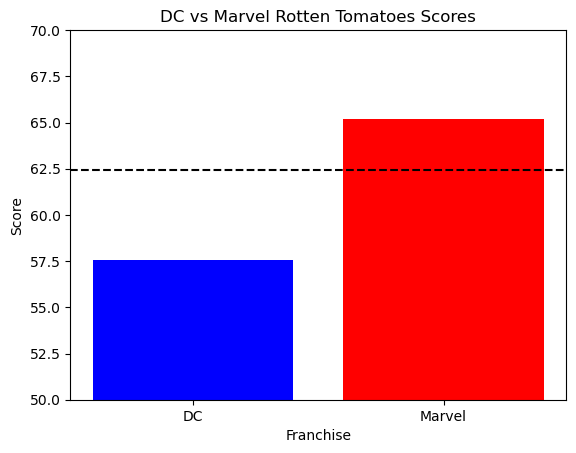

In [27]:
plt.bar(franchise_ratings.index, franchise_ratings, color=['blue', 'red'])

plt.title( 'DC vs Marvel Rotten Tomatoes Scores')
plt.xlabel('Franchise')
plt.ylabel('Score')
plt.axhline(rotten_avg, color='black', linestyle='--') #average between the two franchises
#plt.xlim(['Franchise'])
plt.ylim(50,70)
#plt.box(['franchise_ratings'])
#plt.grid(y=62.43)
plt.tight_layout
plt.savefig(os.path.join('images','marvel_v_dc_score.png'))
plt.show()

In [28]:
franchise_budgets = marvel_dc_movie_df.groupby('Franchise')['Budget'].mean()
franchise_budgets

Franchise
DC        1.246366e+08
Marvel    1.546250e+08
Name: Budget, dtype: float64

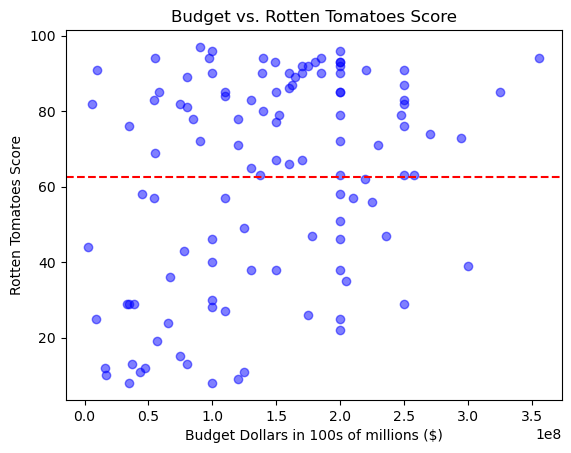

In [29]:
plt.scatter(marvel_dc_movie_df['Budget'],marvel_dc_movie_df['Rotten Tomatoes Critic Score'], alpha = 0.5, color = 'blue')
plt.title('Budget vs. Rotten Tomatoes Score')
plt.xlabel('Budget Dollars in 100s of millions ($)')
plt.ylabel('Rotten Tomatoes Score')
plt.axhline(rotten_avg, color='red', linestyle='--') #average Rotten Tomatoes Score
#plt.grid(axis='y')
#plt.grid(axis='x')
plt.tight_layout
plt.savefig(os.path.join('images','budget_v_score.png'))
plt.show()

In [30]:
#Frenci

In [31]:
grouped = marvel_dc_movie_df.groupby('Franchise')[['Minutes', 'Budget']].sum().reset_index()
grouped.head()

,Franchise,Minutes,Budget
0,DC,5147,5.110100e+09
1,Marvel,8872,1.113300e+10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


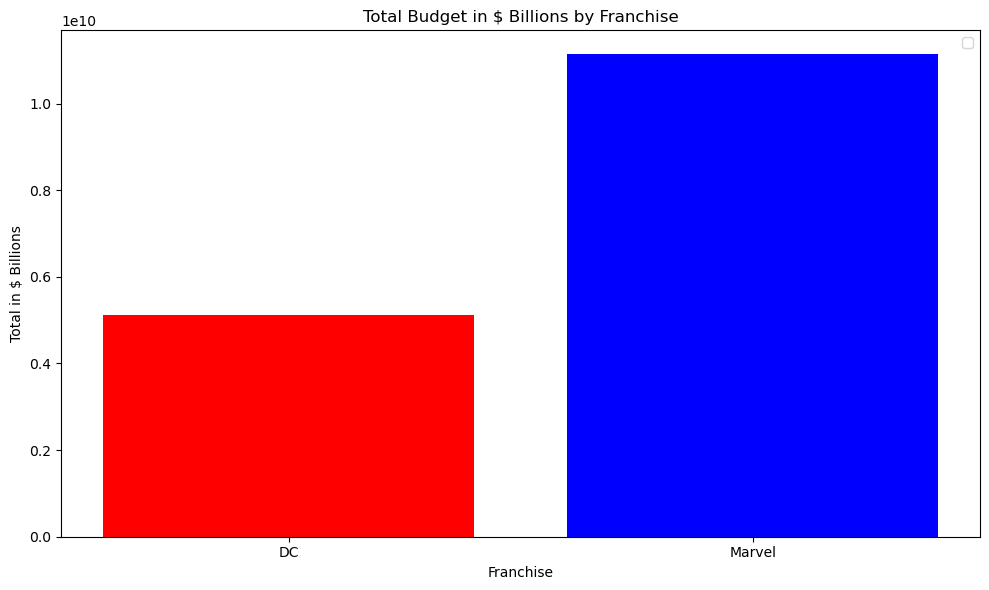

In [32]:
# Group data by Franchise and sum the Minutes and Budget
grouped = marvel_dc_movie_df.groupby('Franchise')[['Minutes', 'Budget']].sum().reset_index()

# Set positions for bars on the x-axis
grouped_franchise = np.arange(len(grouped['Franchise']))  # the label locations
plt.figure(figsize=(10, 6))
#plt.bar(grouped_franchise, grouped['Minutes'], label='Minutes', color=['red', 'lightblue'])
plt.bar(grouped_franchise, grouped['Budget'], color=['red','blue'])
#bottom=grouped['Budget']
#titles and labels
plt.title('Total Budget in $ Billions by Franchise')
plt.xlabel('Franchise')
plt.ylabel('Total in $ Billions' )

# Add x-ticks for Franchise names
plt.xticks(grouped_franchise, grouped['Franchise'])

# Add legend?
plt.legend()

# Show the plot
plt.tight_layout() 
plt.savefig(os.path.join('images', 'total_minutes_and_budget_BUDGET.png'))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


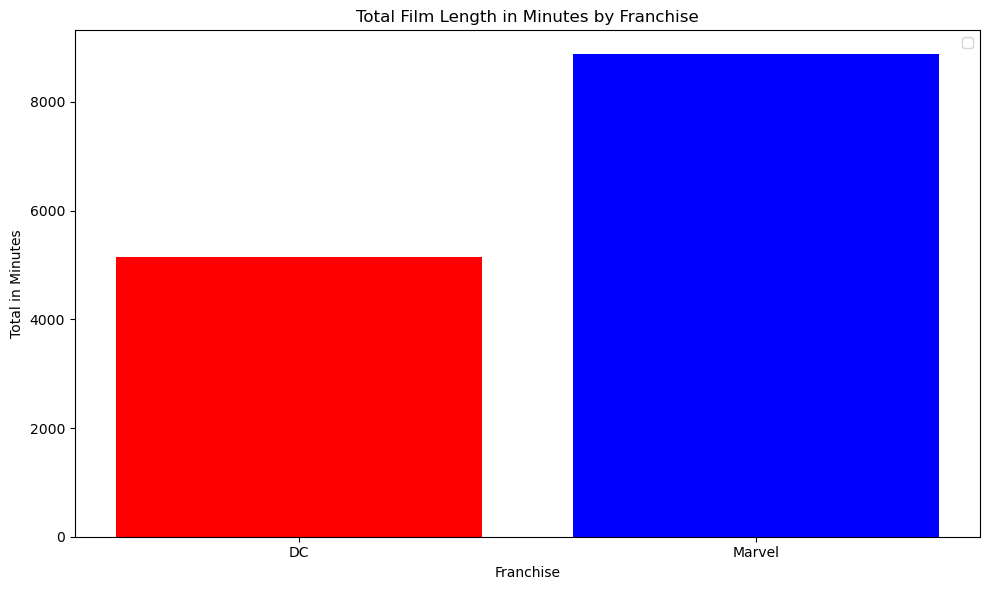

In [33]:
grouped_franchise = np.arange(len(grouped['Franchise']))  # the label locations
plt.figure(figsize=(10, 6))
plt.bar(grouped_franchise, grouped['Minutes'], color=['red', 'blue'])
#plt.bar(grouped_franchise, grouped['Budget'], bottom=grouped['Minutes'], label='Budget ($)', color='lightblue')

#titles and labels
plt.title('Total Film Length in Minutes by Franchise')
plt.xlabel('Franchise')
plt.ylabel('Total in Minutes' )

# Add x-ticks for Franchise names
plt.xticks(grouped_franchise, grouped['Franchise'])

# Add legend?
plt.legend()

# Show the plot
plt.tight_layout() 
plt.savefig(os.path.join('images', 'total_minutes_and_budget_MINUTES.png'))
plt.show()